# Conduct centrality analysis on one of the regular spikes

Graph(number_of_edges=91201, number_of_vertices=25666, number_of_temporal_edges=145486068, earliest_time="10800000", latest_time="14399999")


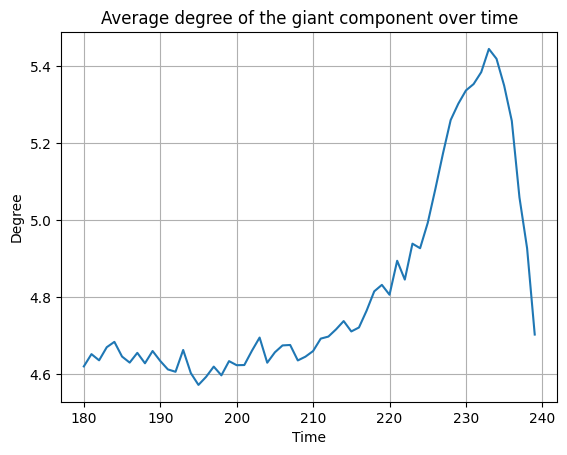

In [22]:
import os
from raphtory import Graph
from collections import Counter
from raphtory import algorithms as rp
import matplotlib.pyplot as plt
import pandas as pd

# Specify the file path
binecode_path = "C:/ms_bincode/Graph_4"

# Load the file
if os.path.isfile(binecode_path):
    g = Graph.load_from_file(binecode_path)
    print(g)
else:
    print(f"File does not exist: {binecode_path}")

# Run a community detection algorithm which checks lcc in the graph
lcc =  rp.weakly_connected_components(g)

# Make it a dictionary
components_dict = lcc.get_all()

# Count the frequency of each component ID
component_sizes = Counter(components_dict.values())

# Find the top ten giant component
gc = component_sizes.most_common(1)

# Create a list to hold names of the nodes in the gc
gc_nodes = []

# Populate the list
for name, component_id in components_dict.items():
    if component_id == gc[0][0]:
        gc_nodes.append(name)

# Make a subgraph
gc_subgraph = g.subgraph(gc_nodes)
gc_subgraph

"""
Diagram which gives the average degree of the giant component over time
"""

num_temp_edges = []
time = []

for windowed_graph in gc_subgraph.rolling(window=60000):
    result = rp.average_degree(windowed_graph)
    num_temp_edges.append(result)
    time_in_minutes = windowed_graph.earliest_time / 60000
    time.append(time_in_minutes)

plt.plot(time, num_temp_edges)
plt.xlabel("Time")
plt.ylabel("Degree")
plt.title("Average degree of the giant component over time")
plt.grid(True)

In [23]:
start_time = 13800000 # Minute 230
end_time = 14040000 # Minute 234
gc_spike = gc_subgraph.window(start_time, end_time)
print(gc_spike)

# Get top 10 most important ms
results = rp.pagerank(gc_spike)
top_10 = results.top_k(10)
print(top_10)

Graph(number_of_edges=52039, number_of_vertices=16631, number_of_temporal_edges=12785342, earliest_time="13800000", latest_time="14039999")
[('MS_27421', 0.02586039311744866), ('MS_37691', 0.01603425414121621), ('MS_2827', 0.0048258580606901314), ('MS_46825', 0.0041454571920861594), ('MS_21537', 0.003067185846295923), ('MS_44585', 0.0026567962095660324), ('MS_21883', 0.0025300291629888286), ('MS_19585', 0.0021240921612589204), ('MS_27487', 0.00197026863841261), ('MS_46708', 0.0016948742187964574)]


In [24]:
# 1. Retrieve all nodes and their out-degrees
nodes_out_degrees = [(node.name, node.out_degree()) for node in gc_spike.vertices]

# 2. Sort nodes by their out-degree in descending order
sorted_nodes = sorted(nodes_out_degrees, key=lambda x: x[1], reverse=True)

# 3. Select the top 10 nodes
top_10_nodes = sorted_nodes[:20]

# Print names and out-degrees of the top 10 nodes
for name, out_degree in top_10_nodes:
    print(f"Node Name: {name}, Out-Degree: {out_degree}")

Node Name: USER, Out-Degree: 1966
Node Name: MS_39211, Out-Degree: 249
Node Name: MS_45285, Out-Degree: 247
Node Name: MS_25557, Out-Degree: 240
Node Name: MS_15934, Out-Degree: 154
Node Name: MS_39564, Out-Degree: 139
Node Name: MS_745, Out-Degree: 134
Node Name: MS_4990, Out-Degree: 123
Node Name: MS_54865, Out-Degree: 105
Node Name: MS_4660, Out-Degree: 101
Node Name: MS_66850, Out-Degree: 89
Node Name: MS_3311, Out-Degree: 81
Node Name: MS_64512, Out-Degree: 79
Node Name: MS_44698, Out-Degree: 75
Node Name: MS_60860, Out-Degree: 72
Node Name: MS_8811, Out-Degree: 70
Node Name: MS_50048, Out-Degree: 70
Node Name: MS_18249, Out-Degree: 66
Node Name: MS_26809, Out-Degree: 59
Node Name: MS_44065, Out-Degree: 56


In [25]:
# 1. Retrieve all nodes and their out-degrees
nodes_out_degrees = [(node.name, node.in_degree()) for node in gc_spike.vertices]

# 2. Sort nodes by their out-degree in descending order
sorted_nodes = sorted(nodes_out_degrees, key=lambda x: x[1], reverse=True)

# 3. Select the top 20 nodes
top_10_nodes = sorted_nodes[:20]

# Print names and out-degrees of the top 20 nodes
for name, in_degree in top_10_nodes:
    print(f"Node Name: {name}, In-Degree: {in_degree}")

Node Name: MS_27421, In-Degree: 2854
Node Name: MS_37691, In-Degree: 1254
Node Name: MS_2827, In-Degree: 856
Node Name: MS_46825, In-Degree: 741
Node Name: MS_21883, In-Degree: 337
Node Name: MS_21537, In-Degree: 288
Node Name: MS_35973, In-Degree: 281
Node Name: MS_14728, In-Degree: 279
Node Name: MS_44585, In-Degree: 273
Node Name: MS_46708, In-Degree: 256
Node Name: MS_68453, In-Degree: 251
Node Name: MS_14304, In-Degree: 251
Node Name: MS_27239, In-Degree: 243
Node Name: MS_55085, In-Degree: 206
Node Name: MS_4354, In-Degree: 199
Node Name: MS_8234, In-Degree: 190
Node Name: MS_32402, In-Degree: 188
Node Name: MS_19585, In-Degree: 188
Node Name: MS_1278, In-Degree: 187
Node Name: MS_29635, In-Degree: 180


In [26]:
print(rp.global_reciprocity(gc_spike))
print(gc_spike.count_vertices())

0.042046585705753536
16631


In [21]:
print(rp.global_reciprocity(g))
print(g.count_vertices())

0.05051935253672848
25666
